# GROUPWORK ASSIGNMENT 
## Titanic Survival Prediction 

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Load dataset

In [2]:
data = pd.read_csv("tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Ensure proper column names

In [3]:
# this remopves spaces from the column headings
data.columns = data.columns.str.strip()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Handle missing values

In [4]:
# fills missing values (NaNs) in a Pandas DataFrame with the median of each numeric column.
data = data.fillna(data.median(numeric_only=True))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Encode categorical if exists (like Sex)

In [ ]:
# converting column sex in into numerical male:1, female:0 
# the first line in code enhances that the sex.dtype changes from object to int
if 'Sex' in data.columns and data['Sex'].dtype == 'object':
    data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


Keep only numeric columns for analysis

In [6]:
# selects all the columns in data that contain numbers only and stores them in a new DataFrame called numeric_data.
numeric_data = data.select_dtypes(include=['number'])

Split features and target

In [44]:
# features and targets -- survived is the target the other columns are the features which ill use to predict the outcome in survived.
X = numeric_data.drop(columns=['Survived'])
y = numeric_data['Survived']

Split into train, validation, and test (70/15/15)

In [8]:
# Train	- Where your model learns it sees this data and adjusts its weights.
# Validation (Val)-	Used to tune the model eg picking the best number of trees, learning rate, or regularization. 
# The model does not learn from validation, it only uses it for feedback.
# Test - Used at the very end to measure true performance — it's data the model has never seen and never used in any way during training.
# x_test, y_test: This is your final test set (15% of all data)
# x_temp, y_temp: This is the temporary dataset holding the remaining 85% of data — which you'll later split into train and validation
# That's why it's called temp(temporary) it’s not a final split, just an intermediate result.
# x_train, y_train → 70% of the original data (used to train the model)
# x_val, y_val → 15% of the original data (used to tune the model)
# Why 0.1765? Because you're splitting 85% into 70/15, so:15/85 = 0.1765
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

Train model

In [9]:
# model = LogisticRegression(max_iter=1000)-- Creates a logistic regression model.
# max_iter=1000 increases the number of iterations the solver will try to converge to find a solution.
# model.fit(x_train, y_train) -Trains the model using the training features x_train and labels y_train.
# The model learns the relationship between the features and the target (like which variables influence survival).
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Evaluate on Validation Set

In [20]:
y_val_pred = model.predict(x_val)
y_val_probs = model.predict_proba(x_val)[:, 1] #pick 2nd column
#''' It gives probabilities for each class, e.g. 
# [[0.83, 0.17],
# [0.12, 0.88],
# [0.45, 0.55]]
# where:
# First column = probability of class 0 (did not survive)
# Second column = probability of class 1 (survived)
# '''
print (y_val_pred)
print (y_val_probs)

[0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
[0.04763095 0.02903363 0.93161092 0.9289478  0.02929552 0.93737262
 0.03775568 0.96131115 0.92743212 0.03399834 0.0296064  0.03631586
 0.97028984 0.02889928 0.03115611 0.02623219 0.94453307 0.04318032
 0.95156652 0.06690622 0.02819532 0.02791528 0.03570514 0.95200269
 0.93489754 0.02713617 0.94662384 0.03783262 0.02923516 0.03205207
 0.03967805 0.9556785  0.02754421 0.02647518 0.0279217  0.92358237
 0.9430893  0.92967119 0.94598338 0.03702636 0.03903963 0.93012543
 0.93103366 0.02637204 0.02812777 0.95780876 0.04040222 0.02583492
 0.92901196 0.02677273 0.0253191  0.02894343 0.0492947  0.02621911
 0.03095479 0.02674771 0.95186557 0.93760664 0.95395788 0.02862574
 0.03749125 0.03769094 0.03193486]


In [ ]:
# Accuracy-	How often the model is correct overall	"Out of all predictions, how many were right?"
# Precision- When the model predicts survived (1), how often is it actually right? "Of all the people it predicted would survive, how many really did?"
# Recall- Out of all who actually survived, how many did the model catch?	"Did the model find all the survivors?"
# F1 Score-	A balanced average of precision and recall	"One score that balances precision and recall (especially useful if data is imbalanced)"
metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred),
    "Recall": recall_score(y_val, y_val_pred),
    "F1 Score": f1_score(y_val, y_val_pred)
}

print (metrics)

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}


In [23]:
# print("\n MODEL PERFORMANCE ON VALIDATION SET ") -Just a title to separate output clearly.
# \n adds a blank line before the title for readability.
# for k, v in metrics.items()-Loops through your metrics dictionary
# print(f"{k}: {v:.3f}")- Prints the metric name (k) and its value (v) rounded to 3 decimal places.
print("\n MODEL PERFORMANCE ON VALIDATION SET ")
for k, v in metrics.items():
    print(f"{k}: {v:.3f}")


 MODEL PERFORMANCE ON VALIDATION SET 
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


 Evaluate on Test Set 

In [13]:
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy (Unseen Data): {test_accuracy:.3f}")


Test Accuracy (Unseen Data): 1.000


Visualizations

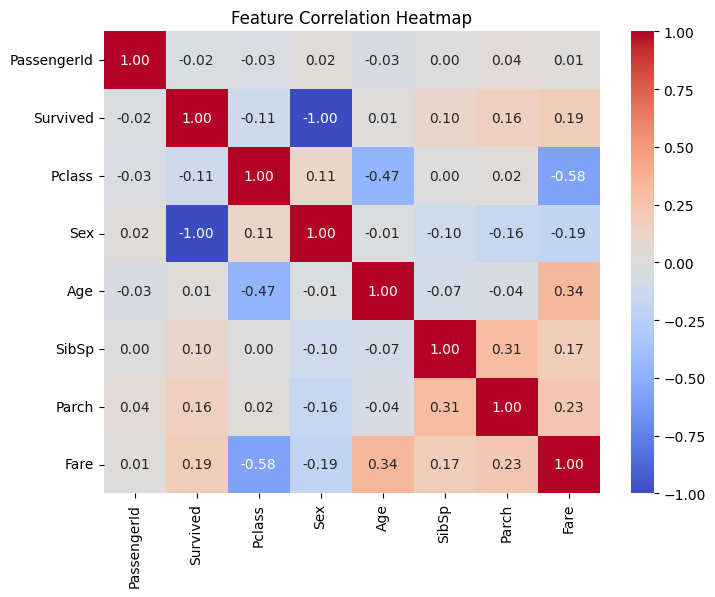

In [30]:
# heatmap for correlating each column by column
plt.figure(figsize=(8,6)) #Sets the figure size to make the plot readable (8 inches wide, 6 inches tall).
corr = numeric_data.corr() # Calculates the correlation matrix for all numeric columns.This gives values between -1 and 1: -1 -perfect -ve correlation ,0 no correlation, +1 -perfect positive correlation
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f') # annot shows correlation values inside each cell, cmap is for the colors , fmt for decimal places
plt.title("Feature Correlation Heatmap")
plt.show()

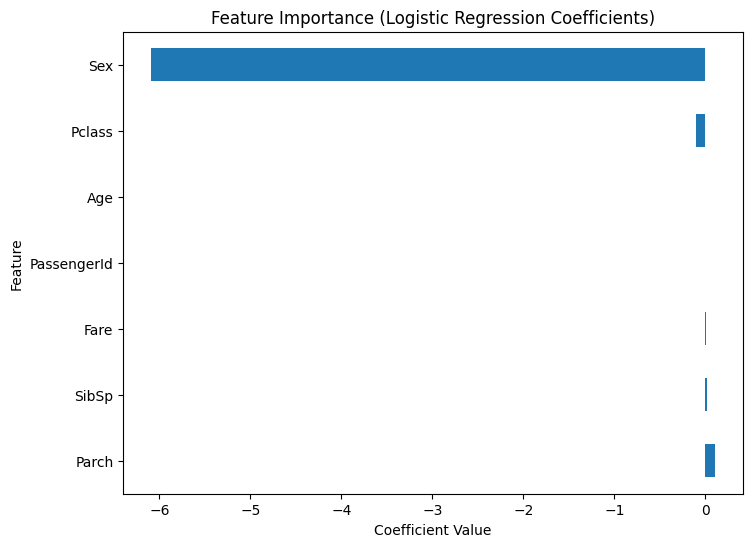

In [33]:
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
feature_importance.plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

Predict survival likelihoods (for demonstration)

In [34]:
print("\nUsing validation dataset for demonstration of likely survivors...")
predictions = pd.DataFrame({
    'Predicted_Probability': y_val_probs,
    'Actual_Survived': y_val.reset_index(drop=True) #since we randomly selected data, this ensures pandas does not try to arrange by indexes which might cause mismatch issues
})
predictions['Prediction_Label'] = predictions['Predicted_Probability'].apply(
    lambda p: 'Likely to Survive' if p >= 0.5 else 'Likely Not to Survive'
)
print (predictions)


Using validation dataset for demonstration of likely survivors...
    Predicted_Probability  Actual_Survived       Prediction_Label
0                0.047631                0  Likely Not to Survive
1                0.029034                0  Likely Not to Survive
2                0.931611                1      Likely to Survive
3                0.928948                1      Likely to Survive
4                0.029296                0  Likely Not to Survive
..                    ...              ...                    ...
58               0.953958                1      Likely to Survive
59               0.028626                0  Likely Not to Survive
60               0.037491                0  Likely Not to Survive
61               0.037691                0  Likely Not to Survive
62               0.031935                0  Likely Not to Survive

[63 rows x 3 columns]


In [40]:
print("\n SAMPLE PREDICTIONS ")
print(predictions.head(15))


 SAMPLE PREDICTIONS 
    Predicted_Probability  Actual_Survived       Prediction_Label
0                0.047631                0  Likely Not to Survive
1                0.029034                0  Likely Not to Survive
2                0.931611                1      Likely to Survive
3                0.928948                1      Likely to Survive
4                0.029296                0  Likely Not to Survive
5                0.937373                1      Likely to Survive
6                0.037756                0  Likely Not to Survive
7                0.961311                1      Likely to Survive
8                0.927432                1      Likely to Survive
9                0.033998                0  Likely Not to Survive
10               0.029606                0  Likely Not to Survive
11               0.036316                0  Likely Not to Survive
12               0.970290                1      Likely to Survive
13               0.028899                0  Likely Not

In [41]:
print("\nSURVIVAL SUMMARY (For our samples)")
print(predictions['Prediction_Label'].value_counts())


SURVIVAL SUMMARY (For our samples)
Prediction_Label
Likely Not to Survive    40
Likely to Survive        23
Name: count, dtype: int64


FULL DATASET

In [48]:
full_pred = model.predict(X)
full_probs = model.predict_proba(X)[:, 1]
print (full_pred)
print (full_probs)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
[0.02871677 0.92770184 0.02975055 0.02933733 0.93955071 0.03038378
 0.9293834  0.03943685 0.93132464 0.0326789  0.02918658 0.03619571
 0.95660466 0.031

ADDING PREDICTIONS TO MY DATASET 'TESTED.CSV'

In [51]:
data['Predicted_Survival'] = full_pred
data['Survival_Probability'] = full_probs
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted_Survival,Survival_Probability
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,0.028717
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1,0.927702
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,0.029751
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,0.029337
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,1,0.939551


In [52]:
if 'Predicted_Survival' in data.columns and data['Predicted_Survival'].dtype == 'int':
    data['Predicted_Survival'] = data['Predicted_Survival'].map({1: 'Survived', 0: 'didnotsurvive'})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted_Survival,Survival_Probability
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,didnotsurvive,0.028717
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,Survived,0.927702
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,didnotsurvive,0.029751
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,didnotsurvive,0.029337
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,Survived,0.939551


saving to csv-- 'data.to_csv("Predicted_Survival", index = False)''